In [1]:
import numpy as np 
import pandas as pd
from pandas import  DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer,StandardScaler
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)

#导入所有相关数据
train = pd.read_csv('C:/Users/Administrator.-20170614IXISUQ/Desktop/幸福感/happiness_train_complete.csv', encoding='gbk')
test_data = pd.read_csv('C:/Users/Administrator.-20170614IXISUQ/Desktop/幸福感/happiness_test_complete.csv', encoding='gbk')
submit = pd.read_csv('C:/Users/Administrator.-20170614IXISUQ/Desktop/幸福感/happiness_submit.csv', encoding='gbk')


In [2]:
#查看所有数据结构
print (train.shape)
print (test_data.shape)
print (submit.shape)

(8000, 140)
(2968, 139)
(2968, 2)


In [3]:
#查看前10行数据
train.head(10)

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,edu_other,edu_status,edu_yr,income,political,join_party,floor_area,property_0,property_1,property_2,property_3,property_4,property_5,property_6,property_7,property_8,property_other,height_cm,weight_jin,health,health_problem,depression,hukou,hukou_loc,media_1,media_2,media_3,media_4,media_5,media_6,leisure_1,leisure_2,leisure_3,leisure_4,leisure_5,leisure_6,leisure_7,leisure_8,leisure_9,leisure_10,leisure_11,leisure_12,socialize,relax,learn,social_neighbor,social_friend,socia_outing,equity,class,class_10_before,class_10_after,class_14,work_exper,work_status,work_yr,work_type,work_manage,insur_1,insur_2,insur_3,insur_4,family_income,family_m,family_status,house,car,invest_0,invest_1,invest_2,invest_3,invest_4,invest_5,invest_6,invest_7,invest_8,invest_other,son,daughter,minor_child,marital,marital_1st,s_birth,marital_now,s_edu,s_political,s_hukou,s_income,s_work_exper,s_work_status,s_work_type,f_birth,f_edu,f_political,f_work_14,m_birth,m_edu,m_political,m_work_14,status_peer,status_3_before,view,inc_ability,inc_exp,trust_1,trust_2,trust_3,trust_4,trust_5,trust_6,trust_7,trust_8,trust_9,trust_10,trust_11,trust_12,trust_13,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
0,1,4,1,12,32,59,2015/8/4 14:18,1,1959,1,1,1,11,NaN,4.0,-2.0,20000,1,NaN,45.0,0,1,0,0,0,0,0,0,0,NaN,176,155,3,2,5,5,2.0,4,2,5,5,4,3,1,4,3,1,2,3,4,1,4,5,4,1,2,4,3,3.0,3.0,2,3,3,3,3,1,1,3.0,30.0,1.0,2.0,1,1,1,2,60000.0,2,2,1,2,0,1,0,0,0,0,0,0,0,NaN,1,0,0.0,3,1984.0,1958.0,1984.0,6.0,1.0,5.0,40000.0,5.0,NaN,NaN,-2,4,4,1,-2,4,1,1,3,2,4,3,50000.0,4,2,-8,-8,5,3,2,3,4,3,-8,4,1,4,50,60,50,50,30.0,30,50,50,50
1,2,4,2,18,52,85,2015/7/21 15:04,1,1992,1,1,1,12,NaN,4.0,2013.0,20000,1,NaN,110.0,0,0,0,0,1,0,0,0,0,NaN,170,110,5,4,3,1,1.0,2,2,1,3,5,1,2,3,4,3,5,4,3,2,3,4,5,1,2,4,3,6.0,2.0,1,3,6,4,8,5,1,3.0,2.0,1.0,3.0,1,1,1,1,40000.0,3,4,1,2,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972,3,1,2,1973,3,1,2,1,1,4,2,50000.0,5,4,4,3,5,3,3,3,2,3,3,3,2,3,90,70,70,80,85.0,70,90,60,60
2,3,4,2,29,83,126,2015/7/21 13:24,2,1967,1,0,3,4,NaN,4.0,-2.0,2000,1,NaN,120.0,0,1,1,0,0,0,0,0,0,NaN,160,122,4,4,5,1,1.0,2,2,2,5,1,3,1,4,4,3,5,4,4,2,3,5,5,5,3,4,2,2.0,5.0,2,4,5,4,6,3,2,NaN,NaN,NaN,NaN,1,1,2,2,8000.0,3,3,1,2,0,1,0,0,0,0,0,0,0,NaN,0,2,1.0,3,1990.0,1968.0,1990.0,3.0,1.0,1.0,6000.0,3.0,NaN,NaN,-2,1,1,2,-2,1,1,2,2,1,4,2,80000.0,3,3,3,3,4,3,3,3,3,3,-8,3,1,4,90,80,75,79,80.0,90,90,90,75
3,4,5,2,10,28,51,2015/7/25 17:33,2,1943,1,1,1,3,NaN,4.0,1959.0,6420,1,NaN,78.0,0,0,0,1,0,0,0,0,0,NaN,163,170,4,4,4,1,2.0,2,1,1,5,1,1,1,5,2,4,5,4,5,1,1,5,5,5,2,4,4,1.0,6.0,1,4,5,5,7,2,4,NaN,NaN,NaN,NaN,2,2,2,2,12000.0,3,3,1,1,0,1,0,0,0,0,0,0,0,NaN,1,4,0.0,7,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,14,1,2,-2,1,1,2,2,1,3,2,10000.0,3,3,4,3,5,3,3,5,4,3,3,3,2,3,100,90,70,80,80.0,90,90,80,80
4,5,4,1,7,18,36,2015/8/10 9:50,2,1994,1,1,1,12,NaN,1.0,2014.0,-1,2,NaN,70.0,0,0,0,0,1,0,0,0,0,NaN,165,110,5,5,3,2,3.0,1,3,4,2,5,5,3,3,3,2,4,4,3,5,2,5,5,1,4,3,4,7.0,5.0,3,2,1,1,1,4,6,NaN,NaN,NaN,NaN,1,2,2,2,-2.0,4,3,1,1,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,6,1,10,1972,4,1,15,3,2,3,-8,200000.0,4,3,3,3,5,5,3,4,3,3,3,3,2,2,50,50,50,50,50.0,50,50,50,50
5,6,5,2,18,52,86,2015/7/18 12:09,1,1946,1,1,1,2,NaN,NaN,NaN,5000,1,NaN,300.0,0,1,1,0,0,0,0,0,0,NaN,172,140,5,5,4,1,1.0,1,1,4,4,1,1,1,5,4,5,5,4,4,4,3,5,3,5,3,3,2,3.0,4.0,1,4,8,1,8,1,4,NaN,NaN,NaN,NaN,1,1,2,2,5000.0,2,3,1,2,0,1,0,0,0,0,0,0,0,NaN,2,1,0.0,3,1988.0,1949.0,1988.0,1.0,1.0,1.0,0.0,4.0,NaN,NaN,-2,2,1,2,1917,1,1,2,3,1,4,3,10000.0,4,3,4,3,5,4,3,3,4,3,3,3,3,4,90,90,90,90,90.0,90,80,90,90
6,7,4,1,10,27,49,2015/7/26 14:51,1,1963,1,1,1,4,NaN,4.0,1979.0,-3,4,1980.0,89.0,0,1,0,0,0,0,0,0,0,NaN,160,120,2,2,2,2,2.0,2,2,2,5,1,2,1,5,5,5,5,4,4,4,4,4,4,5,1,3,1,NaN,NaN,1,4,2,2,3,2,1,3.0,30.0,1.0,

In [4]:
#查看训练集详情
train.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 140 columns):
id                      8000 non-null int64
happiness               8000 non-null int64
survey_type             8000 non-null int64
province                8000 non-null int64
city                    8000 non-null int64
county                  8000 non-null int64
survey_time             8000 non-null object
gender                  8000 non-null int64
birth                   8000 non-null int64
nationality             8000 non-null int64
religion                8000 non-null int64
religion_freq           8000 non-null int64
edu                     8000 non-null int64
edu_other               3 non-null object
edu_status              6880 non-null float64
edu_yr                  6028 non-null float64
income                  8000 non-null int64
political               8000 non-null int64
join_party              824 non-null float64
floor_area              8000 non-null float64
proper

In [5]:
#查看标签分布情况
print (train['happiness'].unique())
print (train['happiness'].value_counts())

[ 4  5  2  3  1 -8]
 4    4818
 5    1410
 3    1159
 2     497
 1     104
-8      12
Name: happiness, dtype: int64


In [6]:
#排除异常值-8
train = train[train['happiness']!=-8]

In [7]:
#处理时间序列获取被调查人群年龄
from datetime import datetime
train['age'] = pd.to_datetime(train['survey_time']).dt.year - train['birth']
test_data['age'] = pd.to_datetime(test_data['survey_time']).dt.year - test_data['birth']

In [8]:

#删除缺失值较多且感觉无具体含义的数据

ind1 = ['id','edu_other','edu_status','edu_yr','join_party','property_other','work_status','work_yr','work_type','work_manage',
       'invest_other','survey_time','birth']
X = train.drop(ind1,axis=1)
X_test_data = test_data.drop(ind1,axis=1)
#X.info(verbose=True,null_counts=True)



In [9]:
#对所有缺失行进行补充充填
#因样本中有着多种与字段解释不匹配的负数存在， 统一将其负数改为-8
X['hukou_loc'] = X['hukou_loc'].fillna(4)
X = X.fillna(-8)
X[X<0]=-8
X.head()
X_test_data['hukou_loc'] = X_test_data['hukou_loc'].fillna(4)
X_test_data = X_test_data.fillna(-8)
X_test_data[X_test_data<0]=-8


In [10]:
#查看修正后的训练集详情
X.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7988 entries, 0 to 7999
Data columns (total 128 columns):
happiness               7988 non-null int64
survey_type             7988 non-null int64
province                7988 non-null int64
city                    7988 non-null int64
county                  7988 non-null int64
gender                  7988 non-null int64
nationality             7988 non-null int64
religion                7988 non-null int64
religion_freq           7988 non-null int64
edu                     7988 non-null int64
income                  7988 non-null int64
political               7988 non-null int64
floor_area              7988 non-null float64
property_0              7988 non-null int64
property_1              7988 non-null int64
property_2              7988 non-null int64
property_3              7988 non-null int64
property_4              7988 non-null int64
property_5              7988 non-null int64
property_6              7988 non-null int64
property_7

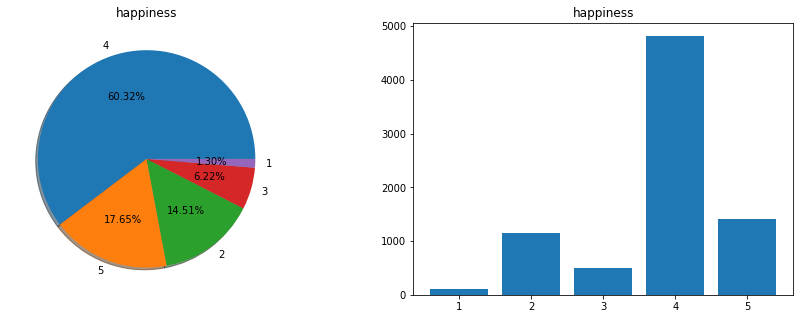

In [11]:
#对数据进行初步图形分析，看单个指标与结果间的关系

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].pie(X['happiness'].value_counts(),labels =X['happiness'].unique(),shadow=True ,autopct='%1.2f%%')
ax[1].bar(X['happiness'].unique(),X['happiness'].value_counts())
ax[0].set_title('happiness')
ax[1].set_title('happiness')
plt.show()

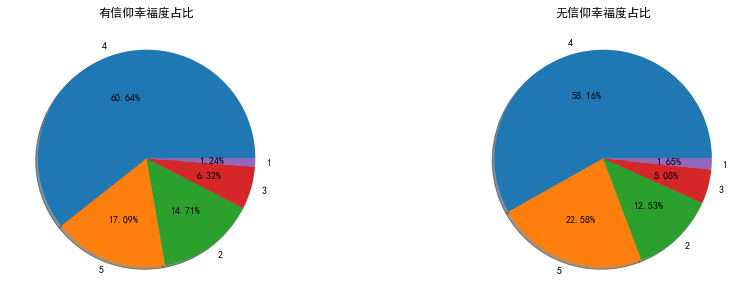

In [15]:
#探究宗教信仰幸福度


fig , ax = plt.subplots(1,2,figsize = (15,5))
ax[0].pie(X[X['religion']==1]['happiness'].value_counts(),labels =X['happiness'].unique(),shadow=True ,autopct='%1.2f%%')
ax[1].pie(X[X['religion']==0]['happiness'].value_counts(),labels =X['happiness'].unique(),shadow=True ,autopct='%1.2f%%')
ax[0].set_title('有信仰幸福度占比')
ax[1].set_title('无信仰幸福度占比')
plt.show()
#可大致看出无信仰的人幸福度会相对好点

Text(0.5, 1.0, 'Sex:happiness')

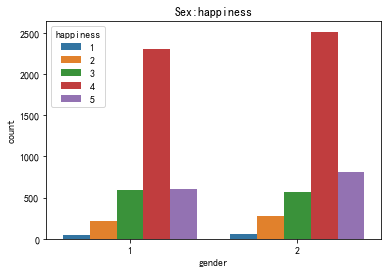

In [16]:
# 探究性别和幸福感的分布
ax = plt.axes()
sns.countplot(x='gender',hue='happiness',data=X)
ax.set_title('Sex:happiness')

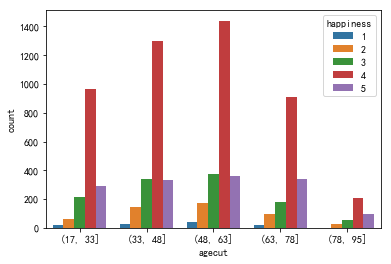

In [17]:
#针对不同年龄段来探究幸福感
X['age'].min()
X['age'].max()
ax = plt.axes()
X['agecut'] = pd.cut(X['age'],[17,33,48,63,78,95])
X['agecut'].head()
sns.countplot('agecut', hue='happiness', data=X)

In [18]:
#因此数据没做转换，无法做标准化，仅用来上图显示，直接删除
X=X.drop(['agecut'],axis=1)
#分离标签转换标签
X_train1 = X.drop(['happiness'],axis=1)
X_label = X['happiness']

In [19]:
#因各特征差距影响较大，进行标准化
std = StandardScaler().fit(X_train1.values)
X_train_std = std.transform(X_train1)
std_1 = StandardScaler().fit(X_test_data.values)
X_test_std = std_1.transform(X_test_data)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [21]:
#利用不同模型进行特征筛选
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

    
#randomforest
rf_est = RandomForestClassifier(random_state=0)
rf_param_grid = {'n_estimators':[300,500],'min_samples_split':[2,3],'max_depth':[20]}
rf_grid = model_selection.GridSearchCV(rf_est,rf_param_grid,n_jobs=25,cv=10,verbose=1)
rf_grid.fit(X_train_std,X_label)
print('Top N Features Best RF Params:' + str(rf_grid.best_params_))
print('Top N Features Best RF Score:' + str(rf_grid.best_score_))
print('Top N Features RF Train Score:' + str(rf_grid.score(X_train_std,X_label)))
feature_imp_sorted_rf = pd.DataFrame({'feature':list(X_train1),
                                          'importance':rf_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
features_top_n_rf = feature_imp_sorted_rf.head(30)['feature']
print('Sample 10 Feeatures from RF Classifier')
print(str(features_top_n_rf[:10]))
#AdaBoost
ada_est = AdaBoostClassifier(random_state=0)
ada_param_grid = {'n_estimators':[300,500],'learning_rate':[0.01,0.1]}
ada_grid = model_selection.GridSearchCV(ada_est,ada_param_grid,n_jobs=25,cv=10,verbose=1)
ada_grid.fit(X_train_std,X_label)
print('Top N Features Best Ada Params:' + str(ada_grid.best_params_))
print('Top N Features Best Ada Score:' + str(ada_grid.best_score_))
print('Top N Features Ada Train Score:' + str(ada_grid.score(X_train_std,X_label)))
feature_imp_sorted_ada = pd.DataFrame({'feature':list(X_train1),
                                           'importance':ada_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
features_top_n_ada = feature_imp_sorted_ada.head(30)['feature']
print('Sample 10 Features from Ada Classifier:')
print(str(features_top_n_ada[:10]))
    
# DecisionTree
dt_est = DecisionTreeClassifier(random_state=0)
dt_param_grid = {'min_samples_split':[2,4],'max_depth':[20]}
dt_grid = model_selection.GridSearchCV(dt_est,dt_param_grid,n_jobs=25,cv=10,verbose=1)
dt_grid.fit(X_train_std,X_label)
print('Top N Features Bset DT Params:' + str(dt_grid.best_params_))
print('Top N Features Best DT Score:' + str(dt_grid.best_score_))
print('Top N Features DT Train Score:' + str(dt_grid.score(X_train_std,X_label)))
feature_imp_sorted_dt = pd.DataFrame({'feature':list(X_train1),
                                          'importance':dt_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
features_top_n_dt = feature_imp_sorted_dt.head(30)['feature']
print('Sample 10 Features from DT Classifier:')
print(str(features_top_n_dt[:10]))
    
# merge the three models
features_top_n = pd.concat([features_top_n_rf,features_top_n_ada,features_top_n_dt],
                              ignore_index=True).drop_duplicates()
features_importance = pd.concat([feature_imp_sorted_rf,
                                     feature_imp_sorted_ada,feature_imp_sorted_dt],ignore_index=True)
    



Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  32 out of  40 | elapsed:  2.3min remaining:   34.0s
[Parallel(n_jobs=25)]: Done  40 out of  40 | elapsed:  2.5min finished


Top N Features Best RF Params:{'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 300}
Top N Features Best RF Score:0.6165498247371056
Top N Features RF Train Score:0.9914872308462694
Sample 10 Feeatures from RF Classifier
52            equity
11        floor_area
25        depression
3             county
126              age
2               city
22        weight_jin
62     family_income
53             class
21         height_cm
Name: feature, dtype: object
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  32 out of  40 | elapsed:  2.1min remaining:   31.9s
[Parallel(n_jobs=25)]: Done  40 out of  40 | elapsed:  2.3min finished


Top N Features Best Ada Params:{'learning_rate': 0.1, 'n_estimators': 300}
Top N Features Best Ada Score:0.6186780170255383
Top N Features Ada Train Score:0.620555833750626
Sample 10 Features from Ada Classifier:
52               equity
25           depression
55       class_10_after
53                class
3                county
64        family_status
63             family_m
29              media_2
101         inc_ability
124    public_service_8
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    1.4s remaining:    0.7s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    1.6s finished


Top N Features Bset DT Params:{'max_depth': 20, 'min_samples_split': 2}
Top N Features Best DT Score:0.49649474211316974
Top N Features DT Train Score:0.9762143214822233
Sample 10 Features from DT Classifier:
52            equity
25        depression
11        floor_area
21         height_cm
53             class
3             county
22        weight_jin
102          inc_exp
9             income
50     social_friend
Name: feature, dtype: object


In [27]:
#仅选择重要特征
X_train_std = pd.DataFrame(X_train1[features_top_n])
X_test_std = pd.DataFrame(X_test_data[features_top_n])

In [35]:
#将特征重要度可视化排行展示
rf_feature_imp = features_importance[:30]
Ada_feature_imp = features_importance[127:127+30].reset_index(drop=True)
dt_feature_imp = features_importance[254:254+30].reset_index(drop=True)
#以特征最大值作为基准，将所有特征化为0-100之间
rf_feature_importance = 100.0 * (rf_feature_imp['importance'] / rf_feature_imp['importance'].max())
Ada_feature_importance = 100.0 * (Ada_feature_imp['importance'] / Ada_feature_imp['importance'].max())
dt_feature_importance = 100.0 * (dt_feature_imp['importance'] / dt_feature_imp['importance'].max())


rf_important_idx = np.where(rf_feature_importance)[0]
Ada_important_idx = np.where(Ada_feature_importance)[0]
dt_important_idx = np.where(dt_feature_importance)[0]

In [38]:
print (Ada_important_idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


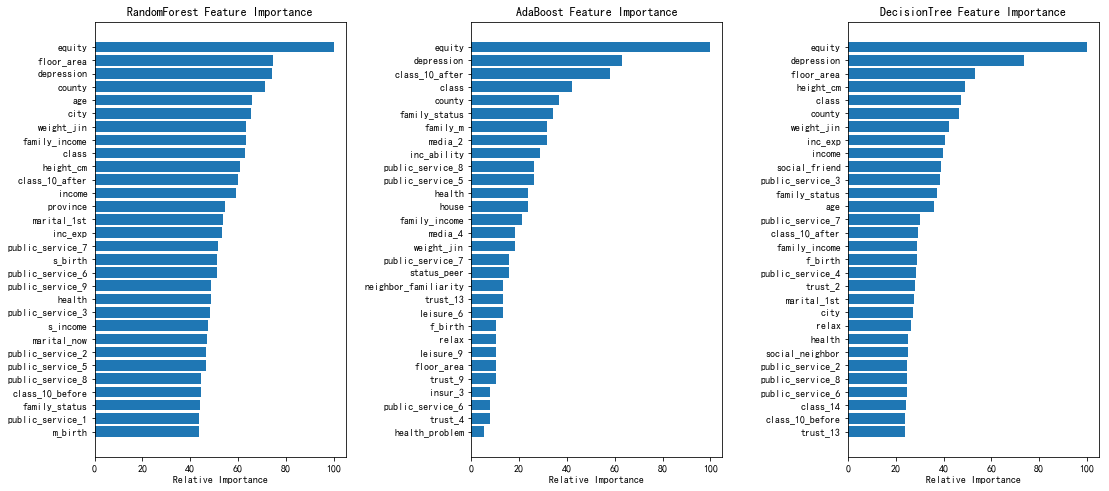

In [39]:
pos = np.arange(rf_important_idx.shape[0]) + .5

plt.figure(1, figsize = (18, 8))

plt.subplots_adjust(wspace=0.5)
plt.subplot(131)
plt.barh(pos, rf_feature_importance[rf_important_idx][::-1])
plt.yticks(pos, rf_feature_imp['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('RandomForest Feature Importance')

plt.subplot(132)
plt.barh(pos, Ada_feature_importance[Ada_important_idx][::-1])
plt.yticks(pos, Ada_feature_imp['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('AdaBoost Feature Importance')


plt.subplot(133)
plt.barh(pos, dt_feature_importance[dt_important_idx][::-1])
plt.yticks(pos, dt_feature_imp['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('DecisionTree Feature Importance')
plt.show()

In [41]:
#选择多种模型测试训练
#此处可以加网格搜索找寻最佳参数
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
 
rf = RandomForestClassifier(n_estimators=500,warm_start=True,max_features='sqrt',max_depth=6,min_samples_split=3,min_samples_leaf=2,n_jobs=-1,verbose=0)
 
ada = AdaBoostClassifier(n_estimators=500,learning_rate=0.1)
 
gb = GradientBoostingClassifier(n_estimators=500,learning_rate=0.008,min_samples_split=3,min_samples_leaf=2,max_depth=5,verbose=0)
 
dt = DecisionTreeClassifier(max_depth=8)
 
knn = KNeighborsClassifier(n_neighbors=2)

In [42]:
#对各模型进行均方误差评分
rf_score = cross_val_score(rf,X_train_std,X_label,cv=5,scoring='neg_mean_squared_error')
ada_score = cross_val_score(ada,X_train_std,X_label,cv=5,scoring='neg_mean_squared_error')
gb_score = cross_val_score(gb,X_train_std,X_label,cv=5,scoring='neg_mean_squared_error')
dt_score = cross_val_score(dt,X_train_std,X_label,cv=5,scoring='neg_mean_squared_error')
knn_score = cross_val_score(knn,X_train_std,X_label,cv=5,scoring='neg_mean_squared_error')

In [44]:
print(rf_score.mean())
print(ada_score.mean())
print(gb_score.mean())
print(dt_score.mean())
print(knn_score.mean())

-0.6712554499606926
-0.6424758884195488
-0.6235512127899262
-0.7113075807711222
-1.4028564273577755


In [47]:
#所以GradientBoostingClassifier算法效果最好
gb.fit(X_train_std,X_label)
y_model =gb.predict(X_test_std)

In [48]:
#将最终结果保存提交至竞赛平台
submit['happiness'] = y_model
submit.to_csv('gb_clf.csv', index=None)